# Assignment 1: Text categorization 

In [69]:
from time import time
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import metrics
from sklearn.utils.extmath import density
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import seaborn as sns


# Task 1

In [23]:


def load_dataset(vectorizer, verbose=False, remove=()) :
    """Load and vectorize the 20 newsgroups dataset."""

    # Load the data
    data_train = fetch_20newsgroups(
        subset="train",
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    data_test = fetch_20newsgroups(
        subset="test",
        shuffle=True,
        random_state=42,
        remove=remove,
    )

    # Get the target names
    target_names = data_train.target_names
    y_train, y_test = data_train.target, data_test.target

    # Vectorize the texts
    X_train = vectorizer.fit_transform(data_train.data)
    X_test = vectorizer.transform(data_test.data)

    feature_names = vectorizer.get_feature_names_out()


    return X_train, X_test, y_train, y_test, feature_names, target_names

In [65]:
TF_IDF = TfidfVectorizer(
        sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english"
    )
X_train, X_test, y_train, y_test, feature_names, target_names = load_dataset(TF_IDF,
    verbose=True
)
print(f'Number of texts in the train set: {X_train.shape[0]}')
print(f'Number of texts in the test set: {X_test.shape[0]}')
print(f'Vocabulary size: {len(feature_names)}')
print(f'Number of target classes: {len(target_names)}')

Number of texts in the train set: 11314
Number of texts in the test set: 7532
Vocabulary size: 25631
Number of target classes: 20


# Task 2

In [81]:

def benchmark(clf, custom_name, vectorizer=TF_IDF, record_time=False):

    X_train, X_test, y_train, y_test, _, _ = load_dataset(vectorizer)
    
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    if record_time:
        print(f"train time: {train_time:.3}s")
        print(f"test time:  {test_time:.3}s")

    acc = metrics.accuracy_score(y_test, pred)
    prec = metrics.precision_score(y_test, pred, average="macro")
    recall = metrics.recall_score(y_test, pred, average="macro")
    f1 = metrics.f1_score(y_test, pred, average="macro")

    scores = (acc, prec, recall, f1)

    print(f"Accuracy:   {acc:.3}")
    print(f"Precision:   {prec:.3}")
    print(f"Recall:   {recall:.3}")
    print(f"F1 score:   {f1:.3}")

    return custom_name, scores, train_time, test_time

In [67]:
results = []
for clf, name in (
    #(LogisticRegression(C=5, max_iter=1000), "Logistic Regression"),
    #(RidgeClassifier(alpha=1.0, solver="sparse_cg"), "Ridge Classifier"),
    
    #(RandomForestClassifier(), "Random Forest"),
    #(LinearSVC(C=0.1, dual=False, max_iter=1000), "Linear SVC"),
    #(
    #     SGDClassifier(
    #         loss="log_loss", alpha=1e-4, n_iter_no_change=3, early_stopping=True
    #     ),
    #     "log-loss SGD",
    # ),
    (KNeighborsClassifier(n_neighbors=100), "kNN"),
    (NearestCentroid(), "NearestCentroid"),
    (ComplementNB(alpha=0.1), "Complement naive Bayes"),
):
    print("=" * 80)
    print(name)
    results.append(benchmark(clf, name, record_time=True))

kNN
train time: 0.00608s
test time:  5.17s
Accuracy:   0.765
Precision:   0.772
Recall:   0.755
F1 score:   0.753
NearestCentroid
train time: 4.04s
test time:  0.0149s
Accuracy:   0.785
Precision:   0.805
Recall:   0.777
F1 score:   0.783
Complement naive Bayes
train time: 0.0365s
test time:  0.0136s
Accuracy:   0.828
Precision:   0.829
Recall:   0.82
F1 score:   0.819


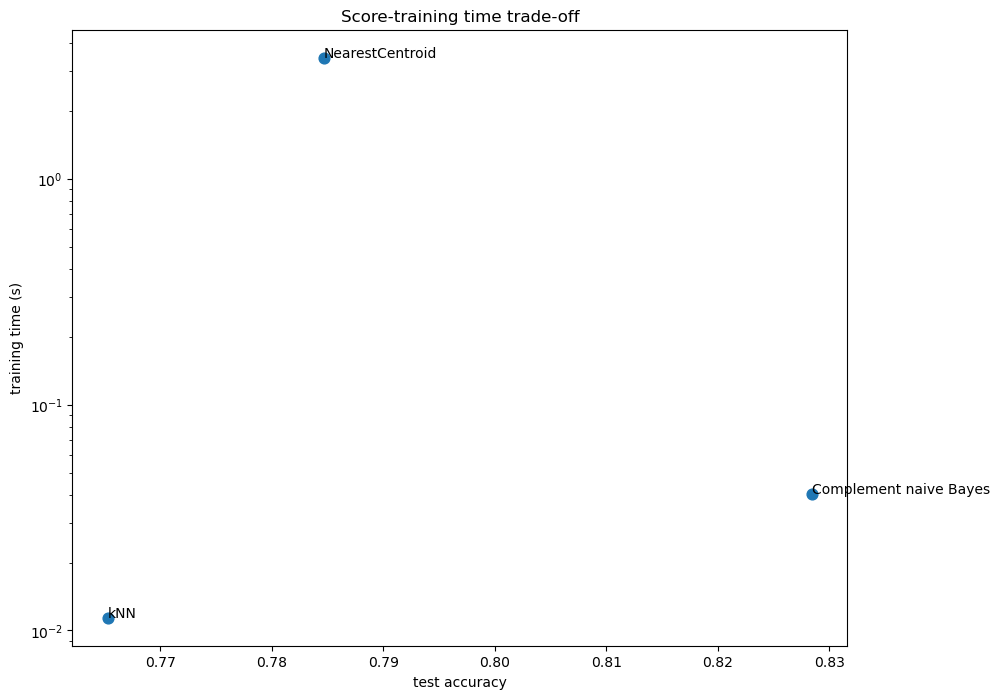

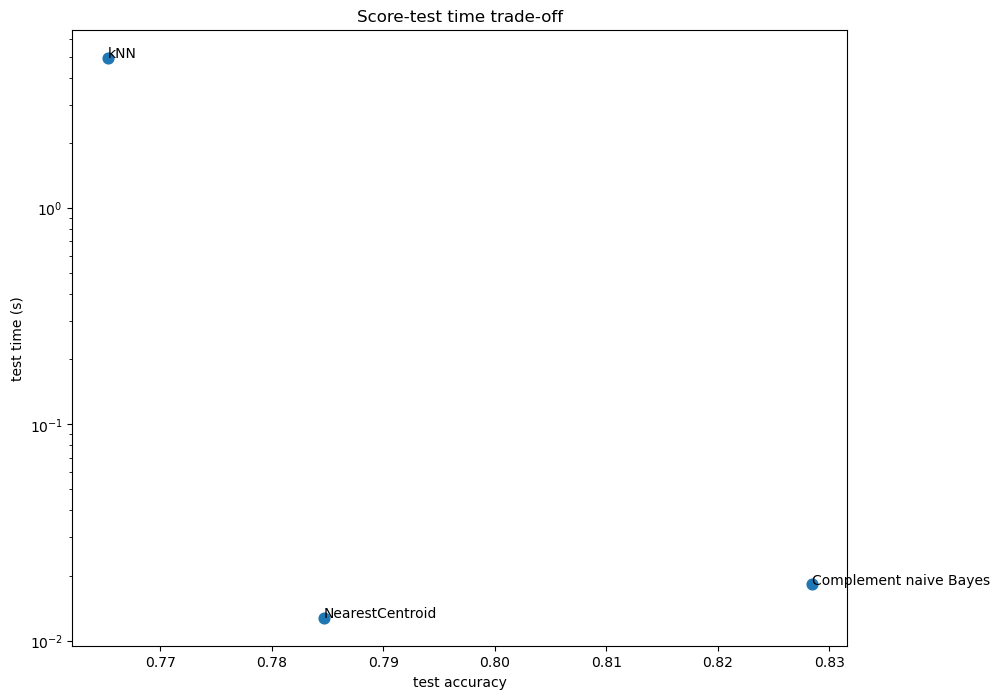

In [54]:

indices = np.arange(len(results))
clf_names = [r[:][0] for r in results]
scores = [r[1] for r in results]  
training_time = [r[2] for r in results]
test_time = [r[3] for r in results]
acc = [s[0] for s in scores]

training_time = np.array(training_time)
test_time = np.array(test_time)
acc = np.array(acc)


fig, ax1 = plt.subplots(figsize=(10, 8))
ax1.scatter(acc, training_time, s=60)
ax1.set(
    title="Score-training time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="training time (s)",
)
fig, ax2 = plt.subplots(figsize=(10, 8))
ax2.scatter(acc, test_time, s=60)
ax2.set(
    title="Score-test time trade-off",
    yscale="log",
    xlabel="test accuracy",
    ylabel="test time (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (acc[i], training_time[i]))
    ax2.annotate(txt, (acc[i], test_time[i]))

# Task 3

In [55]:
vectorizers = {
    "Counts": CountVectorizer(max_df=0.5, min_df=5, stop_words="english"),    
    "TF": TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english"),
    "TF-IDF": TfidfVectorizer(sublinear_tf=True, max_df=0.5, min_df=5, stop_words="english")
}

classifiers = {
    #"LogReg": LogisticRegression(C=5, max_iter=1000),
    "NaiveBayes": ComplementNB(alpha=0.1),
    #"SVM": LinearSVC(C=0.1, dual=False, max_iter=1000),
    "NearestCentroid": NearestCentroid(),
    "kNN": KNeighborsClassifier(n_neighbors=100),
}

In [76]:
def run_experiment(vectorizers=vectorizers, classifiers=classifiers):
    results = []
    for v_name, vectorizer in vectorizers.items():
        for c_name, clf in classifiers.items():
            print("=" * 80)
            print(f'{c_name} + {v_name}')
            clf_descr, score, train_time, test_time = benchmark(clf,  f"{c_name} + {v_name}", vectorizer=vectorizer)
            results.append((clf_descr, score, train_time, test_time))
    return results

results = run_experiment()
    

NaiveBayes + Counts
train time: 0.0264s
test time:  0.0102s
Accuracy:   0.809
Precision:   0.813
Recall:   0.8
F1 score:   0.795
NearestCentroid + Counts
train time: 2.94s
test time:  0.0158s
Accuracy:   0.465
Precision:   0.597
Recall:   0.459
F1 score:   0.467
kNN + Counts


c:\ProgramData\Anaconda3\envs\TextMining\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


train time: 0.00355s
test time:  2.95s
Accuracy:   0.324
Precision:   0.613
Recall:   0.316
F1 score:   0.313
NaiveBayes + TF
train time: 0.0223s
test time:  0.00869s
Accuracy:   0.833
Precision:   0.835
Recall:   0.822
F1 score:   0.821
NearestCentroid + TF
train time: 2.54s
test time:  0.0118s
Accuracy:   0.666
Precision:   0.7
Recall:   0.659
F1 score:   0.667
kNN + TF
train time: 0.00468s
test time:  3.05s
Accuracy:   0.657
Precision:   0.669
Recall:   0.649
F1 score:   0.645
NaiveBayes + TF-IDF
train time: 0.022s
test time:  0.0085s
Accuracy:   0.828
Precision:   0.829
Recall:   0.82
F1 score:   0.819
NearestCentroid + TF-IDF
train time: 2.38s
test time:  0.0124s
Accuracy:   0.785
Precision:   0.805
Recall:   0.777
F1 score:   0.783
kNN + TF-IDF
train time: 0.00416s
test time:  3.04s
Accuracy:   0.765
Precision:   0.772
Recall:   0.755
F1 score:   0.753


In [70]:

def plot_heatmap(results, metric_idx=0, metric_name="Accuracy"):
    clf_names = [r[0] for r in results]
    scores = [r[1][metric_idx] for r in results]

    classifiers = sorted(set(name.split("+")[0] for name in clf_names))
    vectorizers = sorted(set(name.split("+")[1] for name in clf_names))

    score_matrix = np.zeros((len(classifiers), len(vectorizers)))
    for name, score in zip(clf_names, scores):
        clf, vect = name.split("+")
        i = classifiers.index(clf)
        j = vectorizers.index(vect)
        score_matrix[i, j] = score

    plt.figure(figsize=(8, 6))
    sns.heatmap(score_matrix, annot=True, cmap="Blues",
                xticklabels=vectorizers, yticklabels=classifiers, fmt=".3f", 
                linewidths=0.5, linecolor="gray")
    plt.title(f"{metric_name} by Classifier and Vectorizer")
    plt.show()


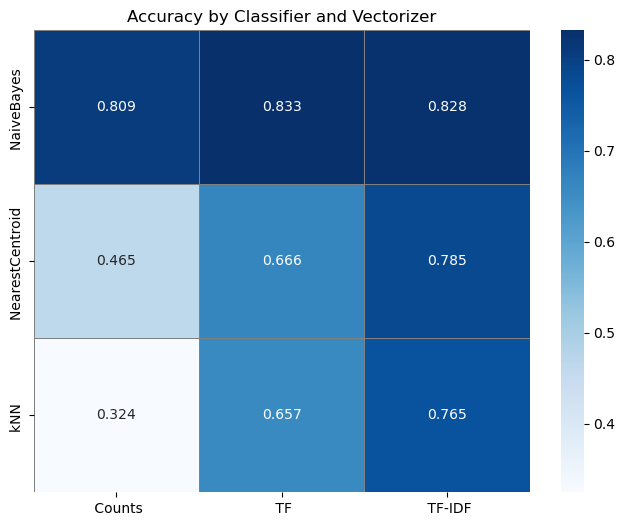

In [73]:
plot_heatmap(results, metric_idx=0, metric_name="Accuracy")

# Task 4

a. Lowercasing

In [86]:
no_lowercase = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english", lowercase=False)
lowercase = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english")

classifiers = {"NaiveBayes": ComplementNB(alpha=0.1)}
vectorizers = {'TF_lowercase': lowercase,
               'TF_no_lowercase': no_lowercase}

results = run_experiment(vectorizers, classifiers)
best_result = max(results, key=lambda x: x[1][0])

print(f"\nBest option: {best_result[0]}")
print(f"Accuracy={best_result[1][0]:.3f}, "
      f"F1={best_result[1][3]:.3f}")


NaiveBayes + TF_lowercase
Accuracy:   0.833
Precision:   0.835
Recall:   0.822
F1 score:   0.821
NaiveBayes + TF_no_lowercase
Accuracy:   0.836
Precision:   0.838
Recall:   0.826
F1 score:   0.825

Best option:NaiveBayes + TF_no_lowercase
Accuracy=0.836, F1=0.825


b. Stop_words

In [87]:
no_stopwords = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5)
stopwords = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english")

vectorizers = {'TF_no_stopwords': lowercase,
               'TF_stopwords': no_lowercase}

results = run_experiment(vectorizers, classifiers)
best_result = max(results, key=lambda x: x[1][0])

print(f"\nBest option: {best_result[0]}")
print(f"Accuracy={best_result[1][0]:.3f}, "
      f"F1={best_result[1][3]:.3f}")

NaiveBayes + TF_no_stopwords
Accuracy:   0.833
Precision:   0.835
Recall:   0.822
F1 score:   0.821
NaiveBayes + TF_stopwords
Accuracy:   0.836
Precision:   0.838
Recall:   0.826
F1 score:   0.825

Best option: NaiveBayes + TF_stopwords
Accuracy=0.836, F1=0.825


c. Analyzer


In [88]:
v1 = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english")
v2 = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english", analyzer='char', ngram_range=(2,2))
v3 = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english", analyzer='char_wb', ngram_range=(2,2))
v4 = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english", analyzer='char', ngram_range=(3,3))
v5 = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english", analyzer='char_wb', ngram_range=(3,3))
v6 = TfidfVectorizer(use_idf=False, norm="l2", max_df=0.5, min_df=5, stop_words="english", ngram_range=(2,2))

vectorizers = {
    "word_unigram": v1,
    "char_bigram": v2,
    "char_wb_bigram": v3,
    "word_bigram": v6,
    "char_trigram": v4,
    "char_wb_trigram": v5, 
}


results = run_experiment(vectorizers, classifiers)
best_result = max(results, key=lambda x: x[1][0])

print(f"\nBest option: {best_result[0]}")
print(f"Accuracy={best_result[1][0]:.3f}, "
      f"F1={best_result[1][3]:.3f}")

NaiveBayes + word_unigram
Accuracy:   0.833
Precision:   0.835
Recall:   0.822
F1 score:   0.821
NaiveBayes + char_bigram


c:\ProgramData\Anaconda3\envs\TextMining\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Accuracy:   0.503
Precision:   0.527
Recall:   0.496
F1 score:   0.476
NaiveBayes + char_wb_bigram


c:\ProgramData\Anaconda3\envs\TextMining\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Accuracy:   0.508
Precision:   0.533
Recall:   0.501
F1 score:   0.482
NaiveBayes + word_bigram
Accuracy:   0.728
Precision:   0.723
Recall:   0.726
F1 score:   0.721
NaiveBayes + char_trigram


c:\ProgramData\Anaconda3\envs\TextMining\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Accuracy:   0.764
Precision:   0.769
Recall:   0.753
F1 score:   0.748
NaiveBayes + char_wb_trigram


c:\ProgramData\Anaconda3\envs\TextMining\Lib\site-packages\sklearn\feature_extraction\text.py:539: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


Accuracy:   0.76
Precision:   0.765
Recall:   0.75
F1 score:   0.745

Best option: NaiveBayes + word_unigram
Accuracy=0.833, F1=0.821


d. Max features

In [89]:

v1 = TfidfVectorizer(use_idf=False, norm="l2", max_features=500, stop_words="english")
v2 = TfidfVectorizer(use_idf=False, norm="l2", max_features=1000, stop_words="english")
v3 = TfidfVectorizer(use_idf=False, norm="l2", max_features=2000, stop_words="english")
v4 = TfidfVectorizer(use_idf=False, norm="l2", max_features=5000, stop_words="english")
v5 = TfidfVectorizer(use_idf=False, norm="l2", max_features=10000, stop_words="english")
v6 = TfidfVectorizer(use_idf=False, norm="l2", max_features=None, stop_words="english") 

vectorizers = {
    "max500": v1,
    "max1000": v2,
    "max2000": v3,
    "max5000": v4,
    "max10000": v5,
    "all_features": v6,
}
results = run_experiment(vectorizers, classifiers)
best_result = max(results, key=lambda x: x[1][0])

print(f"\nBest option: {best_result[0]}")
print(f"Accuracy={best_result[1][0]:.3f}, "
      f"F1={best_result[1][3]:.3f}")


NaiveBayes + max500
Accuracy:   0.547
Precision:   0.541
Recall:   0.532
F1 score:   0.508
NaiveBayes + max1000
Accuracy:   0.636
Precision:   0.638
Recall:   0.621
F1 score:   0.604
NaiveBayes + max2000
Accuracy:   0.718
Precision:   0.722
Recall:   0.704
F1 score:   0.695
NaiveBayes + max5000
Accuracy:   0.78
Precision:   0.786
Recall:   0.766
F1 score:   0.761
NaiveBayes + max10000
Accuracy:   0.813
Precision:   0.816
Recall:   0.801
F1 score:   0.799
NaiveBayes + all_features
Accuracy:   0.843
Precision:   0.845
Recall:   0.834
F1 score:   0.834

Best option: NaiveBayes + all_features
Accuracy=0.843, F1=0.834
